# EXPLORATORY DATA ANALISYS (EDA)

This notebook shows an EDA as a preliminary exploration and visualization of data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("C:/Users/Fernando/Desktop/Proyecto_Final_ML/src")
import eda 

In [4]:
# Dataset loading

data = pd.read_csv("../data/data_train.csv", index_col=0)
# data = data.set_index("Complaint ID")

In [4]:
data["Company response"].unique()

array(['Closed with explanation', 'Closed with non-monetary relief',
       'Closed', 'In progress', 'Closed with monetary relief',
       'Untimely response'], dtype=object)

In [6]:
# Skrub visualization. This let us to explore different things about features such as data type, missing data, distributions...

from skrub import TableReport

TableReport(data)

Processing column  13 / 13


,,,,,,,,,,,,,


In [4]:
data["Company"].value_counts().sort_values(ascending=False).head(27)

Company
Equifax                                1642
Experian                               1568
TransUnion                             1230
Bank of America                        1211
Wells Fargo                            1153
JPMorgan Chase                          999
Citibank                                785
Ocwen                                   748
Nationstar Mortgage                     602
Capital One                             453
GE Capital Retail                       381
U.S. Bancorp                            339
Enhanced Recovery Company, LLC          331
Encore Capital Group                    308
Green Tree Servicing, LLC               305
Discover                                302
Navient                                 296
Amex                                    216
PNC Bank                                196
Portfolio Recovery Associates, Inc.     194
TD Bank                                 180
Select Portfolio Servicing, Inc         174
Transworld Systems Inc. 

## Columns description


| **Column**               | **Meaning**                                                                                         |
| ------------------------ | --------------------------------------------------------------------------------------------------- |
| **Complaint ID**         | Unique identifier of the submitted complaint                                                        |
| **Product**              | Type of financial product involved (e.g., *Credit card*, *Mortgage*, *Loan*)                        |
| **Sub-product**          | Subcategory of the product (e.g., *Auto loan*, *FHA mortgage*, *Debit card*)                        |
| **Issue**                | Main topic of the complaint (e.g., *Incorrect information on credit report*)                        |
| **Sub-issue**            | More specific detail of the issue (e.g., *Account status incorrect*)                                |
| **State**                | Consumer's state of residence (e.g., *CA*, *NY*, etc.)                                              |
| **ZIP code**             | Consumer's ZIP/postal code                                                                          |
| **Date received**        | Date the agency received the complaint                                                              |
| **Date sent to company** | Date the complaint was forwarded to the financial company                                           |
| **Company**              | Name of the financial institution involved                                                          |
| **Company response**     | Official response from the company (e.g., *Closed with explanation*, *Closed with monetary relief*) |
| **Timely response?**     | Whether the company responded within the regulatory time frame (usually 15 days)                    |
| **Consumer disputed?**   | Whether the co                                                                                      |




First of all, Checking for duplicated values.

In [5]:
data[data.duplicated(keep=False)] # There aren't duplicated values

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?


There are some of features that have a high cardinality (>40 unique values). We'll work with them later but first we're going to look closely at the features that have less than 40 unique values (Product, Company response, Timely response?, Consumer disputed?)

In [6]:
# Information of features using pandas

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22524 entries, 19787 to 24168
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Complaint ID          22524 non-null  int64  
 1   Product               22524 non-null  object 
 2   Sub-product           14029 non-null  object 
 3   Issue                 22524 non-null  object 
 4   Sub-issue             10565 non-null  object 
 5   State                 22189 non-null  object 
 6   ZIP code              22299 non-null  float64
 7   Date received         22524 non-null  object 
 8   Date sent to company  22524 non-null  object 
 9   Company               22524 non-null  object 
 10  Company response      22524 non-null  object 
 11  Timely response?      22524 non-null  object 
 12  Consumer disputed?    4789 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 2.4+ MB


### Visualization of features with low cardinality (less than 40 unique values)

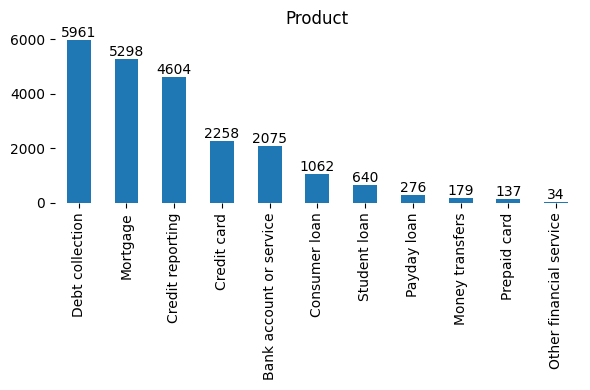

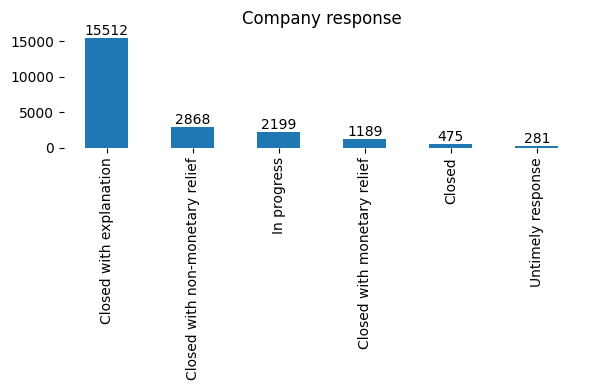

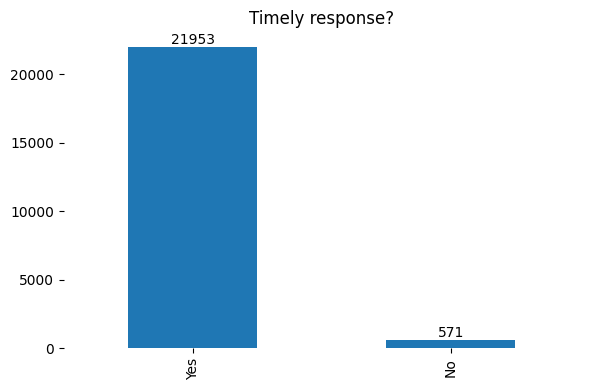

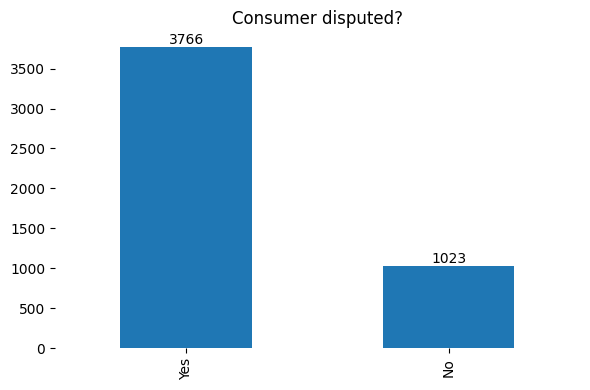

In [7]:
features_with_low_cardinality = [i for i in data.columns if len(data[i].unique()) < 40]
eda.visualization_features(data,*features_with_low_cardinality)

## MISSING VALUES

In [8]:
eda.missing_values(data, *list(data.columns))

,feature,missing_values
0,Complaint ID,0
1,Product,0
2,Sub-product,8495
3,Issue,0
4,Sub-issue,11959
5,State,335
6,ZIP code,225
7,Date received,0
8,Date sent to company,0
9,Company,0


These analyses show how features with low cardinality are imbalanced, except Product. Among all fo them, Company response seems to be the best option as target feature since the imbalance can be compesated by resizing of the values.

## Creación de un informe con ydata-profiling

In [7]:
## YDATA-Profiling

from ydata_profiling import ProfileReport

profile = ProfileReport(data, title = "Profiling Report",  correlations={"auto": {"calculate": True}})

In [8]:
# Guardado en archivo html para visualización con el navegador

profile.to_file("Informe de dataset.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]